In [1]:
import pandas as pd
import numpy as np
import seaborn as np
from matplotlib import pyplot as plt
from functools import reduce # for merging dataframes
import re

In [2]:
global measurement

In [3]:
def extract_measurement(b_list, b_index):

    # this function extract the data points from B3,B4,B5 and 
    # And return clean data to get_measurment() in dictionay format 
    
    x_spos = b_list.index('LengthValue') # starting index of the x values
    y_spos = b_list.index('Value')# starting index of the y values
    y_epos = len(b_list)# the ending pos of y values
    
    x = b_list[x_spos + 1:y_spos]
    y = b_list[y_spos + 1: y_epos-1]

    null_index = set() # a set to keep the index of null values in either x or y
    
    # loop over x and get the index of the 'null' elements
    for index,value in enumerate(x):
        if value == "null":
            null_index.add(index)

    # loop over y and get the index of the 'null' elements
    for index,value in enumerate(y):
        if value == "null":
            null_index.add(index)    
    

    # removing the x,y pair with null value in either of them
    x = [value for idx, value in enumerate(x) if idx not in null_index]
    y = [value for idx, value in enumerate(y) if idx not in null_index]

    # changing the elements of x and y from string to float
    x_float =[float(item) for item in x]
    y_float =[float(item) for item in y]

    xy_dict = dict(zip(x_float,y_float)) # zip x and y  in dictionary
    xy_dict = {key: xy_dict[key] for key in xy_dict if key <= 500} # delete x,y pair for x > 500
    #print(len(xy_dict))

    decode_dic = {0:'B3',1:'B4',2:'B5'}
    b_width = 'width_'+ decode_dic[b_index]
    
    b_df = pd.DataFrame(list(xy_dict.items()),columns = ['length',b_width])
    b_df['length'] = b_df['length'].astype(int) # convert float value  to int
    
    b_df = b_df.groupby('length',as_index=False)[b_width].mean()
    
    return b_df


def get_measurement(coil_id):

    # this function load the data for B3,B4,B5 measurments
    # It split the data based on ";"
    # It calls extract_measuremnt() function to extract the 
    # clean data pairs for B3,B4,B5
    # And return the values in dictionary format

    print('************************************')
    print("coil Id: ", coil_id)
    root_directory = "data/SampleProcessedData/"

    b3_df = pd.read_csv(root_directory + str(coil_id ) + "B3.csv")
    b4_df = pd.read_csv(root_directory + str(coil_id ) + "B4.csv")
    b5_df = pd.read_csv(root_directory + str(coil_id ) + "B5.csv")

    b3_list = re.split(';', str(b3_df.columns))
    b4_list = re.split(';', str(b4_df.columns))
    b5_list = re.split(';', str(b5_df.columns))

    b_lists = [b3_list,b4_list,b5_list]

    all_B_df = [] # this list contain all b_df for B3,B4,B5(it is list of dataframes )
    
    for b_index, b_list in enumerate(b_lists):
        all_B_df.append(extract_measurement(b_list, b_index))

    
    # merge the dataframes for B3,B4,B5
    dfs = [all_B_df[0], all_B_df[1], all_B_df[2]] #define list of DataFrames
    final_B_df = reduce(lambda  left,right: pd.merge(left,right,on=['length'],
                                            how='outer'), dfs)# merge all DataFrames into one
    
    
    print('*********************************')
    
    return final_B_df # return list of dataframes
    
    

In [34]:
def label_observation():
    coil_df = pd.read_excel("data/CoilDataInput.xlsx")
    count = 0

    # this function get the coil_Id and call the get_measurment()
    # function to get the cleaned value for B3,B4 and B5 in dictionary format
    # from the dictionary it checks if there is constriction or not
    # and add the result to the coil_df

    #load the dataset

    measurement_df = get_measurement(311229)
     # 311210 empty b5
     # 311248 good
     
    return measurement_df


************************************
coil Id:  311229
*********************************
    length  width_B3     width_B4  width_B5
10      10   1322.00  1321.866667   1323.80
11      11   1322.00  1321.800000   1324.15
12      12   1322.05  1322.050000   1324.85
13      13   1322.30  1322.200000   1324.60
14      14   1322.65  1322.050000   1324.70


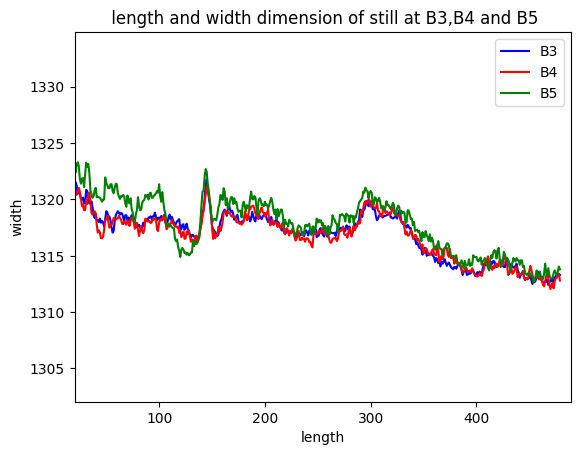

In [40]:
def visualize_measurments():
    measurement_df = label_observation()
    x_upper_limit = measurement_df['length'].max() - 10

    measurement_df=measurement_df[(measurement_df.length >=10) &(measurement_df.length <= x_upper_limit -10)]
    y_lower_limit, y_higher_limit = measurement_df[['width_B3', 'width_B4','width_B5']].min().min().min(), measurement_df[['width_B3', 'width_B4','width_B5']].max().max().max()
    print(measurement_df.head())
    
    plt.plot(measurement_df['length'], measurement_df['width_B3'], color = 'b', label = 'B3')
    plt.plot(measurement_df['length'], measurement_df['width_B4'], color = 'r', label = 'B4')
    plt.plot(measurement_df['length'], measurement_df['width_B5'], color = 'g', label = 'B5')

    plt.xlabel("length")
    plt.ylabel("width")
    plt.title(" length and width dimension of still at B3,B4 and B5")
    
    # need to limit according to data
    plt.ylim(y_lower_limit -10, y_higher_limit + 10)
    plt.xlim(20,x_upper_limit)
    plt.legend()
    plt.show()
    
visualize_measurments()

In [36]:
import os
import re
# return all files as a list
coil_list_const = set()
def coil_merge_samples():
  for file in os.listdir('data\SampleProcessedData'):
#check the files which are end with specific extension
    if file.endswith("B3.csv"):
# print path name of selected files
      a = file[:6]
      coil_list_const.add(a)
    # changing the elements of x and y from string to int
  coil_list_const_int =[int(item) for item in coil_list_const]
  return coil_list_const_int

a = coil_merge_samples()
    
print(a)
print(len(a))

[311247, 311236, 311204, 311221, 311234, 311211, 311239, 300090, 311231, 311241, 311210, 311235, 311220, 311223, 311237, 311249, 290044, 311225, 311233, 311226, 311217, 311248, 311222, 311208, 311203, 311214, 311219, 311212, 311216, 311246, 311227, 311206, 311230, 300112, 311207, 300120, 311213, 311218, 311243, 311238, 311240, 311228, 311209, 322401, 311244, 311224, 311232, 311229, 311215, 311205, 311242, 311245]
52


In [37]:
coil_df = pd.read_excel("data/CoilDataInput.xlsx")
print(coil_df.head())
bbb = coil_df[coil_df.coil.isin(a)]
print(bbb) 

     coil  furnace Number analyse  Hardness_1  Hardness_2        Width  \
0  283642               4    L651       12157         122  1731.316667   
1  283643               1    KN71       11888         124  1602.800000   
2  283644               4    KM81       12419         129  1637.133333   
3  283645               1    KM31       11106         116  1697.450000   
4  283646               4    KM31       11106         116  1693.975000   

   Temperature before finishing mill  Temperature after finishing mill  \
0                                0.0                            906.25   
1                                0.0                            887.75   
2                                0.0                            878.50   
3                                0.0                            869.50   
4                                0.0                            878.50   

   Thickness  Thickness profile  ...    P   S   Al  M_Al  B   N  Ti    Cr   V  \
0     4.3510          44.3372

In [42]:
measurement_df = label_observation()

pd_measurement = measurement_df.sort_index(ascending=True)
#pd_measurement[['B3','B4']] = pd_measurement[['B3','B4']].fillna(method="bfill", axis=0)
#pd_measurement.dropna(inplace=True)
pd_short = pd_measurement.query("index < 180 and index > 120")
print(pd_short)
pd_result = pd_short.filter(items = [pd_short['width_B5'].idxmin()], axis=0)
pd_result_max = pd_short.filter(items = [pd_short['width_B5'].idxmax()], axis=0)

print(pd_result['width_B5'].iloc[0] - pd_result['width_B3'].iloc[0])
print(pd_result['width_B5'].iloc[0] - pd_result['width_B4'].iloc[0])
print(pd_result_max['width_B5'].iloc[0] - pd_result['width_B4'].iloc[0])

print(pd_result.index)
print(pd_result_max.index)


************************************
coil Id:  311229
*********************************
     length     width_B3     width_B4  width_B5
121     121  1317.350000  1316.650000   1315.55
122     122  1317.750000  1316.900000   1315.70
123     123  1317.800000  1317.150000   1315.55
124     124  1317.300000  1316.500000   1315.25
125     125  1317.500000  1316.533333   1315.30
126     126  1317.850000  1317.150000   1315.10
127     127  1317.400000  1316.900000   1315.25
128     128  1317.200000  1317.250000   1315.05
129     129  1316.900000  1316.750000   1315.10
130     130  1316.600000  1316.250000   1315.30
131     131  1316.850000  1316.450000   1315.30
132     132  1316.850000  1316.400000   1316.30
133     133  1316.700000  1315.850000   1315.90
134     134  1316.700000  1316.566667   1316.30
135     135  1316.700000  1316.800000   1316.05
136     136  1316.550000  1316.100000   1316.15
137     137  1316.700000  1316.350000   1316.55
138     138  1316.850000  1316.600000   1316.95
